In [ ]:
# Implement the Monte carlo Method to simulate a stock portfolio


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In [81]:
pip install --upgrade pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [82]:
pip show pandas-datareader


Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: c:\users\ladga\anaconda3\lib\site-packages
Requires: lxml, pandas, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [83]:
# import data
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


In [84]:
stockList = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META']
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)



In [85]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
print(meanReturns)


[*********************100%%**********************]  6 of 6 completed

Ticker
AAPL    0.001612
AMZN    0.001674
GOOG    0.001617
META    0.001498
MSFT    0.000610
TSLA    0.004524
dtype: float64


In [86]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.32366917 0.21775519 0.21969033 0.10964132 0.00954784 0.11969615]


In [87]:
# Monte Carlo Method
# number of simulations
mc_sims = 100
T = 100 #timeframe in days

In [88]:
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T


In [89]:
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialportfolio = 10000

In [90]:
for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)

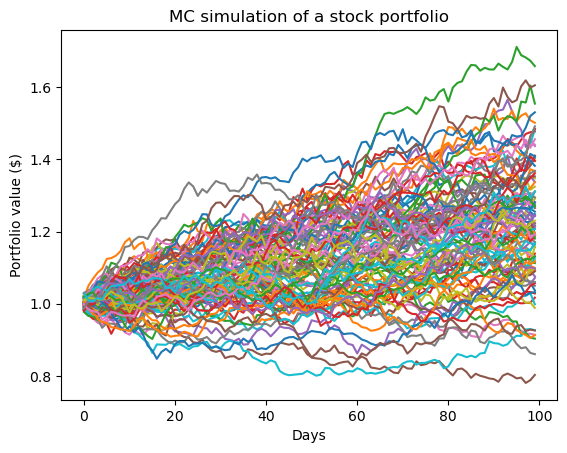

In [91]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()